In [4]:
import numpy as np

Nmax=4
Nmax_sq=int(np.floor(np.sqrt(Nmax))); t_range=range(-Nmax_sq,Nmax_sq+1)
moms_N=[[x,y,z] for x in t_range for y in t_range for z in t_range if np.linalg.norm([x,y,z])**2<=Nmax]
moms_N.sort()

for mom in moms_N:
    print(f'0 0 0 {mom[0]} {mom[1]} {mom[2]} 0 0 0 0 0 0')

0 0 0 -2 0 0 0 0 0 0 0 0
0 0 0 -1 -1 -1 0 0 0 0 0 0
0 0 0 -1 -1 0 0 0 0 0 0 0
0 0 0 -1 -1 1 0 0 0 0 0 0
0 0 0 -1 0 -1 0 0 0 0 0 0
0 0 0 -1 0 0 0 0 0 0 0 0
0 0 0 -1 0 1 0 0 0 0 0 0
0 0 0 -1 1 -1 0 0 0 0 0 0
0 0 0 -1 1 0 0 0 0 0 0 0
0 0 0 -1 1 1 0 0 0 0 0 0
0 0 0 0 -2 0 0 0 0 0 0 0
0 0 0 0 -1 -1 0 0 0 0 0 0
0 0 0 0 -1 0 0 0 0 0 0 0
0 0 0 0 -1 1 0 0 0 0 0 0
0 0 0 0 0 -2 0 0 0 0 0 0
0 0 0 0 0 -1 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 1 0 0 0 0 0 0
0 0 0 0 0 2 0 0 0 0 0 0
0 0 0 0 1 -1 0 0 0 0 0 0
0 0 0 0 1 0 0 0 0 0 0 0
0 0 0 0 1 1 0 0 0 0 0 0
0 0 0 0 2 0 0 0 0 0 0 0
0 0 0 1 -1 -1 0 0 0 0 0 0
0 0 0 1 -1 0 0 0 0 0 0 0
0 0 0 1 -1 1 0 0 0 0 0 0
0 0 0 1 0 -1 0 0 0 0 0 0
0 0 0 1 0 0 0 0 0 0 0 0
0 0 0 1 0 1 0 0 0 0 0 0
0 0 0 1 1 -1 0 0 0 0 0 0
0 0 0 1 1 0 0 0 0 0 0 0
0 0 0 1 1 1 0 0 0 0 0 0
0 0 0 2 0 0 0 0 0 0 0 0


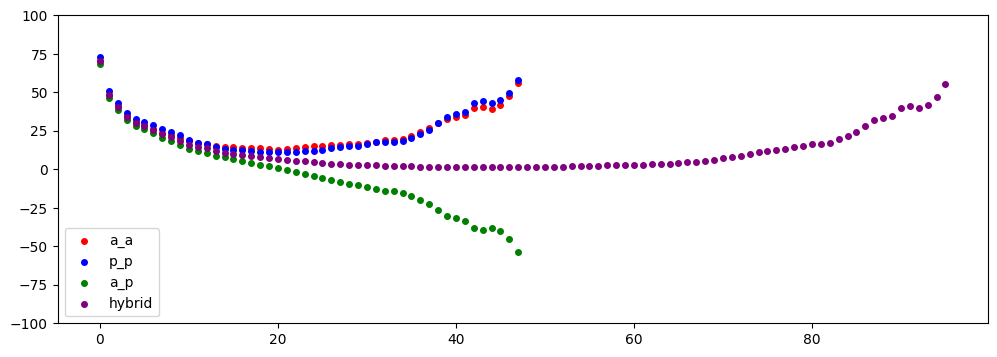

In [90]:
# P
import numpy as np
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['lines.markersize'] = 4
fig, axs = plt.subplots(1, 1, figsize=(12,4), squeeze=False)
ax=axs[0,0]

ti=0
path='/capstor/store/cscs/userlab/s1174/lyan/code/scratch/run/03_NpiScatteringWilson/A15/run_backup/a0050/Diagram0050_P.h5'
with h5py.File(path) as f:
    srcs=list(f.keys()); srcs.sort()
    kys=['a_a','p_p','a_p','p_a','p+a_p+a','p-a_p-a']
    data={ky:np.array([f[f'{src}/PhiPhi/pi2=0_0_0/{ky}'] for src in srcs]) for ky in kys}
    data={ky:data[ky][...,0,0,0]+1j*data[ky][...,0,0,1] for ky in data.keys()}
    data={ky:np.mean(np.real(data[ky])[ti:ti+1],axis=0) for ky in data.keys()}

colorDic={'a_a':'r','p_p':'b','a_p':'g','p_a':'g'}

times=np.arange(48)
for ky in ['a_a','p_p','a_p']:
    ax.scatter(times,data[ky],color=colorDic[ky],label=ky)
times=np.arange(96)
ax.scatter(times,np.concatenate([data['p+a_p+a'],data['p-a_p-a']])/4,color='purple',label='hybrid')
ax.set_ylim([-100,100])
ax.legend()
None

[0 0 0]


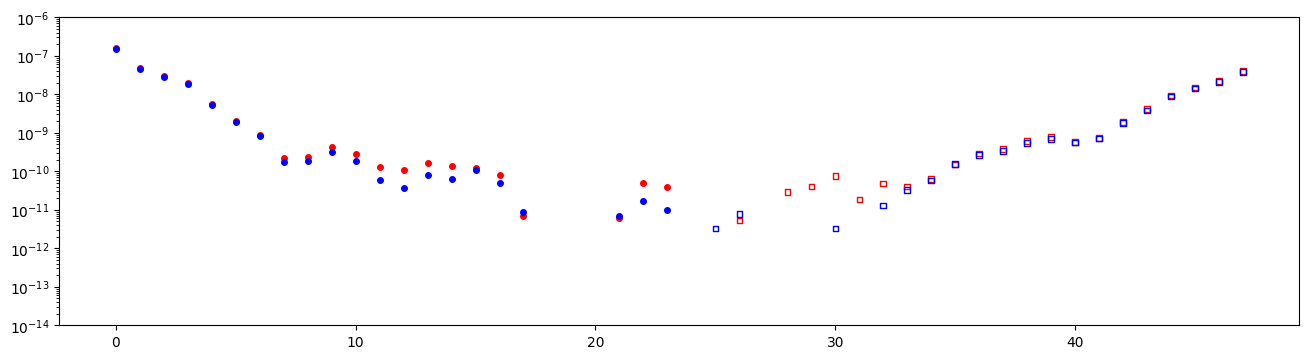

In [139]:
# N
import numpy as np
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['lines.markersize'] = 4
fig, axs = plt.subplots(1, 1, figsize=(16,4), squeeze=False, sharex=True, sharey=True)

colorDic={'N_a':'r','N_ppa_pma':'b'}

ti=0
path='/capstor/store/cscs/userlab/s1174/lyan/code/scratch/run/03_NpiScatteringWilson/A15/run_backup/a0050/Diagram0050_sx000sy006sz031st010_N.h5'
with h5py.File(path) as f:
    src='sx00sy06sz31st10'
    imom=16
    print(f[src]['mvec'][imom])
    for i,ky in enumerate(['N_a','N_ppa_pma']):
        t=f[src][ky][:,imom,0]
        t=t[...,0]+1j*t[...,1]
        dat=t
        if ky=='N_ppa_pma':
            dat/=8
        
        ax=axs[0,0]
        show=24
        t=np.real(dat)[:show,0]+np.real(dat)[:show,5]
        times=np.arange(48)[:show]
        ax.scatter(times,t,color=colorDic[ky])
        
        # ax=axs[0,1]
        t=np.real(dat)[-show:,10] + np.real(dat)[-show:,15]
        times=np.arange(48)[-show:]
        ax.scatter(times,t,color=colorDic[ky],marker='s',facecolors='None')
        
        
ax.set_yscale('log')
ax.set_ylim([1e-14,1e-6])
None